In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import requests

In [230]:
url = 'https://github.com/rodrigosilupu/Psychometrics-Credit-Risk/raw/main/Psychometrics-Credit-Risk-db.xlsx'
data = pd.read_excel(url, engine='openpyxl')
print(data.shape)
data.head(5)

(302, 21)


,_id,sexo,edad,pp_1,pp_2,pp_3,pp_4,pp_5,pp_6,pp_7,...,pp_9,pp_10,pp_11,pp_12,pp_13,pp_14,pp_15,al_dia_marzo,al_dia_abril,al_dia_mayo
0,1,Mujer,27,1,1,1,5,5,5,5,...,5,5,5,5,5,5,5,NaN,NaN,NaN
1,2,Hombre,36,4,2,2,4,4,2,4,...,4,5,4,4,4,5,5,1.0,1.0,1.0
2,3,Mujer,30,2,2,2,5,5,1,4,...,5,5,5,5,4,4,4,1.0,1.0,1.0
3,4,Mujer,39,2,2,2,5,5,1,5,...,5,5,5,5,5,4,5,NaN,NaN,NaN
4,5,Hombre,34,4,3,1,4,4,2,4,...,4,4,5,5,4,4,4,NaN,NaN,NaN


In [231]:
# Drop rows without created credit history
data = data.dropna(subset=['al_dia_marzo', 'al_dia_abril', 'al_dia_mayo', 'edad'])
data.shape

(230, 21)

In [232]:
# def dummy good_payer
def good_payer(x,y,z):
    return 'Good Payer' if x==1 and y==1 and z==1 else 'Non-good Payer'

data['good_payer']=data.apply(lambda row: good_payer(row['al_dia_marzo'], row['al_dia_abril'], row['al_dia_mayo']), axis=1)
data.head(5)

,_id,sexo,edad,pp_1,pp_2,pp_3,pp_4,pp_5,pp_6,pp_7,...,pp_10,pp_11,pp_12,pp_13,pp_14,pp_15,al_dia_marzo,al_dia_abril,al_dia_mayo,good_payer
1,2,Hombre,36,4,2,2,4,4,2,4,...,5,4,4,4,5,5,1.0,1.0,1.0,Good Payer
2,3,Mujer,30,2,2,2,5,5,1,4,...,5,5,5,4,4,4,1.0,1.0,1.0,Good Payer
7,8,Mujer,31,2,2,2,4,5,2,4,...,4,4,4,5,5,4,1.0,1.0,1.0,Good Payer
9,10,Hombre,60,4,1,1,1,5,1,4,...,2,5,5,1,1,5,1.0,1.0,1.0,Good Payer
10,11,Mujer,40,4,4,2,5,5,2,4,...,5,4,4,4,2,4,1.0,1.0,1.0,Good Payer


In [233]:
print(data['good_payer'].value_counts(normalize=True)*100) 

good_payer
Good Payer        80.0
Non-good Payer    20.0
Name: proportion, dtype: float64


- 80.0% of the entries in the dataset are labeled as good payers (good_payer = 1).
- 20.0% of the entries in the dataset are labeled as not good payers (good_payer = 0).

This suggests that a significant majority of the individuals in this dataset have a positive payment history or are deemed to be reliable in terms of their financial obligations. 
I will use a upsampling to balance the classes. 

Before that, I will create the dimentions of Big Five Test:

In [234]:
# Generate the variables of interest: personality dimensions
data['neuroticism'] = (data['pp_1'] + data['pp_2'] + data['pp_3'])
data['extraversion'] = (data['pp_4'] + data['pp_5'] + data['pp_6'])  
data['openness'] = (data['pp_7'] + data['pp_8'] + data['pp_9']) 
data['agreeableness'] = (data['pp_10'] + data['pp_11'] + data['pp_12']) 
data['conscientiousness'] = (data['pp_13'] + data['pp_14'] + data['pp_15']) 

### Analysis

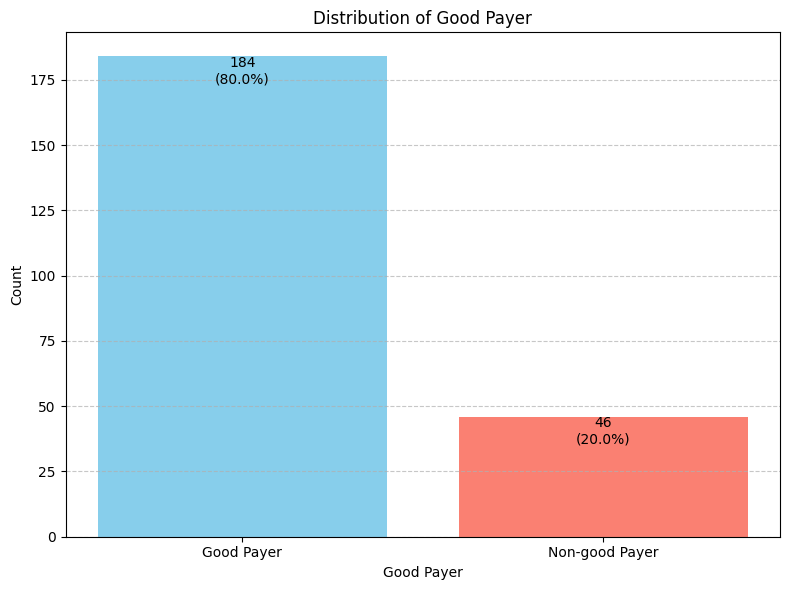

In [235]:
# Distribution of Good Payer
good_payer_counts = data['good_payer'].value_counts()
total = len(data)
percent_0 = (good_payer_counts[0] / total) * 100
percent_1 = (good_payer_counts[1] / total) * 100

plt.figure(figsize=(8,6))
bars = plt.bar(good_payer_counts.index, good_payer_counts.values, color=['skyblue', 'salmon'])
plt.title('Distribution of Good Payer')
plt.xlabel('Good Payer')
plt.ylabel('Count')
plt.xticks([0,1], ['Good Payer', 'Non-good Payer'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - (0.05 * total), 
             f'{yval}\n({yval/total*100:.1f}%)', 
             ha='center', va='bottom', color='black')

plt.show()


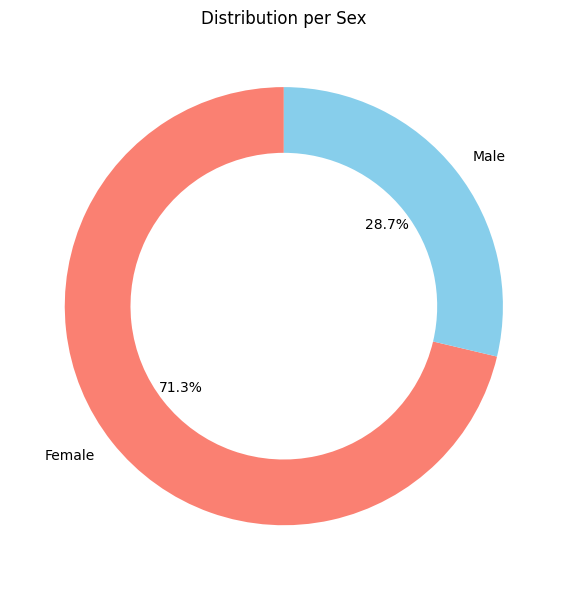

In [236]:
# Distribution per Sex
data['sexo'] = data['sexo'].replace({'Hombre': 'Male', 'Mujer': 'Female'})
sexo_counts = data['sexo'].value_counts()
plt.figure(figsize=(8,6))
sexo_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'], wedgeprops=dict(width=0.3))
plt.title('Distribution per Sex')
plt.ylabel('')  
plt.tight_layout()

plt.show()


<Figure size 800x600 with 0 Axes>

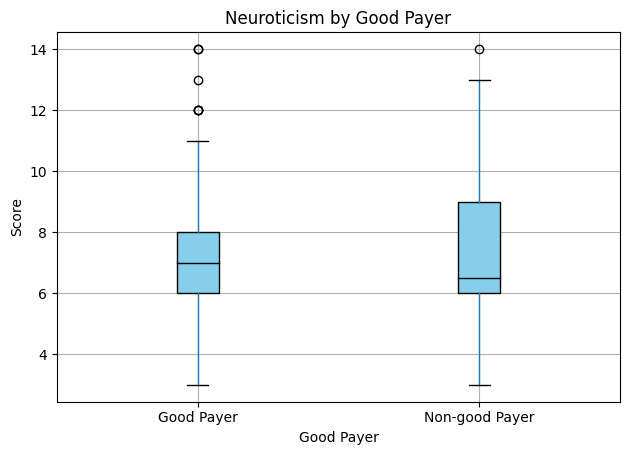

In [237]:
# box plot of neuroticism by good_payer
plt.figure(figsize=(8, 6))
data.boxplot(column='neuroticism', by='good_payer', vert=True, patch_artist=True, 
             boxprops=dict(facecolor='skyblue', color='black'), 
             medianprops=dict(color='black'))
plt.title('Neuroticism by Good Payer')
plt.suptitle('')  # Elimina el título automático del boxplot
plt.xlabel('Good Payer')
plt.xticks([1, 2], ['Good Payer', 'Non-good Payer'])
plt.ylabel('Score')

plt.tight_layout()
plt.show()

**Analysis:** Individuals who are not good payers tend to have slightly higher neuroticism scores compared to those who are good payers. The spread of scores for non-good payers is wider, suggesting a greater variability in neuroticism levels among this group. This could indicate a potential relationship between higher neuroticism and the likelihood of not being a good payer.

<Figure size 800x600 with 0 Axes>

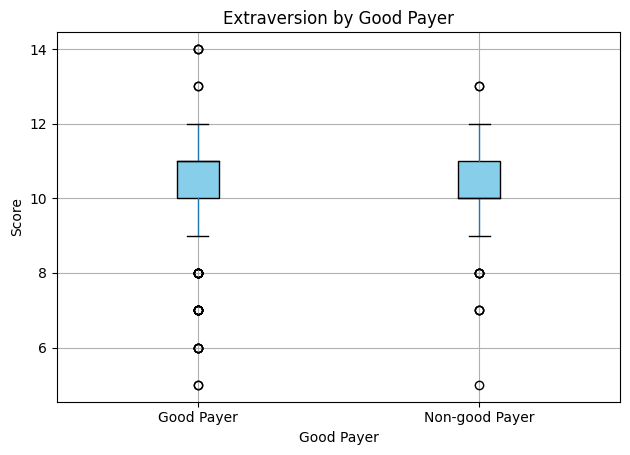

In [238]:
# box plot of extraversion by good_payer
plt.figure(figsize=(8, 6))
data.boxplot(column='extraversion', by='good_payer', vert=True, patch_artist=True, 
             boxprops=dict(facecolor='skyblue', color='black'), 
             medianprops=dict(color='black'))
plt.title('Extraversion by Good Payer')
plt.suptitle('')  # Elimina el título automático del boxplot
plt.xlabel('Good Payer')
plt.xticks([1, 2], ['Good Payer', 'Non-good Payer'])
plt.ylabel('Score')

plt.tight_layout()
plt.show()

**Analysis:** he boxplot suggests that individuals who are not good payers have a distribution of extraversion scores that's roughly similar to those who are good payers. The medians of the two groups appear close, indicating that the central tendency of extraversion scores is comparable across both categories. The spread of scores, as represented by the height of the boxes, is also similar for both groups, suggesting that there's comparable variability in extraversion levels among good payers and non-good payers.In conclusion, it seems that extraversion might not be as distinguishing a factor between good payers and non-good payers as neuroticism appeared to be.

<Figure size 800x600 with 0 Axes>

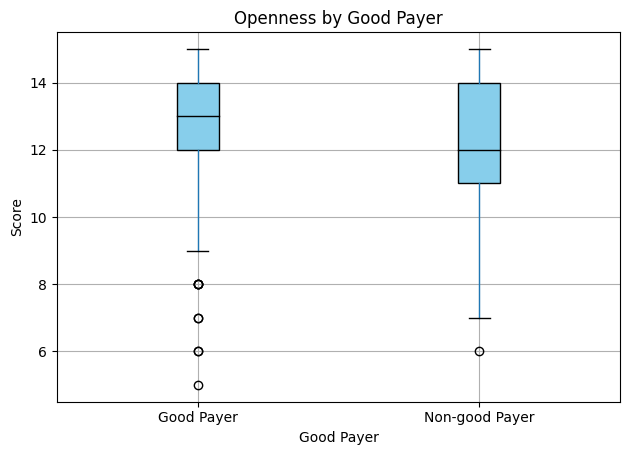

In [239]:
# box plot of openness by good_payer
plt.figure(figsize=(8, 6))
data.boxplot(column='openness', by='good_payer', vert=True, patch_artist=True, 
             boxprops=dict(facecolor='skyblue', color='black'), 
             medianprops=dict(color='black'))
plt.title('Openness by Good Payer')
plt.suptitle('')  # Elimina el título automático del boxplot
plt.xlabel('Good Payer')
plt.xticks([1, 2], ['Good Payer', 'Non-good Payer'])
plt.ylabel('Score')

plt.tight_layout()
plt.show()

**Analysis:** From the boxplot, individuals who are not good payers seem to have slightly lower median scores for openness compared to those who are good payers. The spread of scores, as indicated by the height of the boxes, is relatively similar for both groups, implying a comparable variability in openness levels among both good payers and non-good payers.

<Figure size 800x600 with 0 Axes>

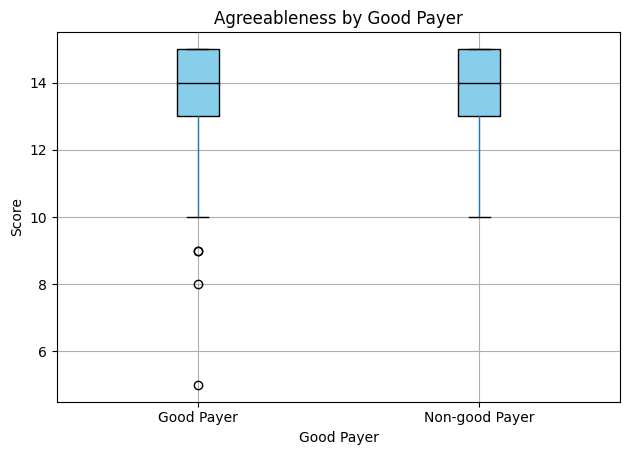

In [240]:
# box plot of agreeableness by good_payer
plt.figure(figsize=(8, 6))
data.boxplot(column='agreeableness', by='good_payer', vert=True, patch_artist=True, 
             boxprops=dict(facecolor='skyblue', color='black'), 
             medianprops=dict(color='black'))
plt.title('Agreeableness by Good Payer')
plt.suptitle('')  # Elimina el título automático del boxplot
plt.xlabel('Good Payer')
plt.xticks([1, 2], ['Good Payer', 'Non-good Payer'])
plt.ylabel('Score')

plt.tight_layout()
plt.show()

**Analysis:** The boxplot shows that individuals who are not good payers tend to have slightly lower median scores for agreeableness compared to those who are good payers. The spread of scores, as represented by the height of the boxes, appears to be somewhat wider for non-good payers, indicating a greater variability in agreeableness levels among this group. Additionally, there are some outliers in the non-good payer category, suggesting that a few individuals have exceptionally high scores for agreeableness.

<Figure size 800x600 with 0 Axes>

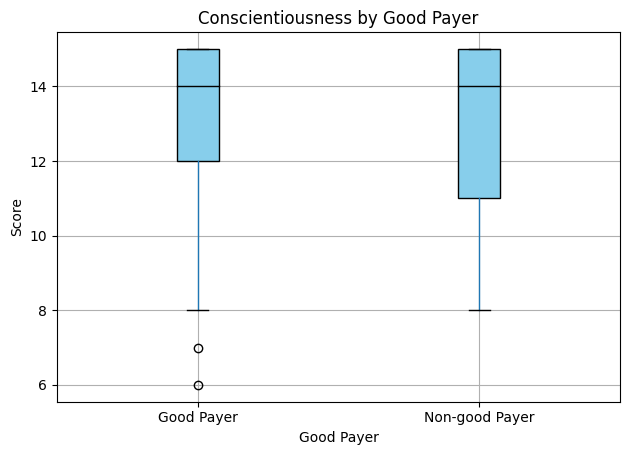

In [241]:
# box plot of conscientiousness by good_payer
plt.figure(figsize=(8, 6))
data.boxplot(column='conscientiousness', by='good_payer', vert=True, patch_artist=True, 
             boxprops=dict(facecolor='skyblue', color='black'), 
             medianprops=dict(color='black'))
plt.title('Conscientiousness by Good Payer')
plt.suptitle('')  # Elimina el título automático del boxplot
plt.xlabel('Good Payer')
plt.xticks([1, 2], ['Good Payer', 'Non-good Payer'])
plt.ylabel('Score')

plt.tight_layout()
plt.show()

**Analysis:** Conscientiousness seems to be a distinguishing factor between good payers and non-good payers. Those with higher conscientiousness scores tend to be good payers. This observation aligns with the general understanding of conscientiousness as a trait associated with responsibility, organization, and dependability.

### Final Modifications:

In [242]:
data = pd.get_dummies(data, columns=['sexo'], drop_first=False)
data=data[['edad', 'neuroticism', 'extraversion', 'openness', 'agreeableness', 'conscientiousness', 'sexo_Female', 'sexo_Male', 'good_payer']]
data['good_payer'] = data['good_payer'].map({'Good Payer': 1, 'Non-good Payer': 0})
data.head(5)

,edad,neuroticism,extraversion,openness,agreeableness,conscientiousness,sexo_Female,sexo_Male,good_payer
1,36,8,10,12,13,14,False,True,1
2,30,6,11,14,15,12,True,False,1
7,31,6,11,12,12,14,True,False,1
9,60,6,7,10,12,7,False,True,1
10,40,10,12,14,13,10,True,False,1


### Analysis of Target variable: Good Payer

In [243]:
from sklearn.utils import resample
upsample_data = data # Create a copy of our original data
majority = upsample_data[upsample_data["good_payer"]==1] # Samples from No churn category
minority = upsample_data[upsample_data["good_payer"]==0] # Samples from Churn category 27%

majority.shape, minority.shape

((184, 9), (46, 9))

In [244]:
# Upsampling to balance the classes
minority_upsampled = resample(minority, replace=True, n_samples=184,random_state=1) 
minority_upsampled.shape

(184, 9)

In [245]:
upsample_data = pd.concat([majority,minority_upsampled])
print('Shape:',  upsample_data.shape)
print(upsample_data["good_payer"].value_counts())
print(' ')
print('Data Information:')
upsample_data.info()

Shape: (368, 9)
good_payer
1    184
0    184
Name: count, dtype: int64
 
Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 1 to 271
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   edad               368 non-null    int64
 1   neuroticism        368 non-null    int64
 2   extraversion       368 non-null    int64
 3   openness           368 non-null    int64
 4   agreeableness      368 non-null    int64
 5   conscientiousness  368 non-null    int64
 6   sexo_Female        368 non-null    bool 
 7   sexo_Male          368 non-null    bool 
 8   good_payer         368 non-null    int64
dtypes: bool(2), int64(7)
memory usage: 23.7 KB


In [246]:
# Partitioning the model
from sklearn.model_selection import train_test_split

label_upsample = upsample_data["good_payer"]
upsample_data.drop("good_payer",inplace = True, axis = 1)
X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

In [247]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve 

In [248]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}


RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30],
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

Xgboost_parameters = {"max_depth" : [3,4,5,6],
    "learning_rate" : [0.001,0.0001],
    "booster" : ["gbtree","gblinear","dart"],
    "min_child_weight" : [1,2,3,4] }

In [249]:
from sklearn.model_selection import GridSearchCV # GridSearch is based on the grid search technique

def grid_search(clf, parameters, xTrain, Ytrain):

    grid_obj = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5) # 'scoring' is used to specify which metric to use for comparing model iterations
    grid_fit = grid_obj.fit(xTrain, Ytrain) # Train
    best_clf = grid_fit.best_estimator_ # Returns the best result obtained in the iterations

    return best_clf


In [250]:
def apply_classifier(clf, xTrain, xTest, yTrain, yTest):

    clf.fit(xTrain, yTrain)  # Train the model
    predictions = clf.predict(xTest)  # Test on the test dataset
    conf_mtx = confusion_matrix(yTest, predictions)  # Confusion matrix of real vs. predicted test data

    f, axes = plt.subplots(ncols=2, figsize=(15, 5))  # Define the visualization area (2 plots)

    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])  # Format for the confusion matrix
    axes[0].set_xlabel('Predicted labels')  # X-axis title for confusion matrix
    axes[0].set_ylabel('True labels')  # Y-axis title for confusion matrix
    axes[0].set_title('Confusion Matrix Test');  # Title for confusion matrix
    axes[0].xaxis.set_ticklabels(['0', '1']);  # X-axis distribution for confusion matrix
    axes[0].yaxis.set_ticklabels(['0', '1']);  # Y-axis distribution for confusion matrix

    print(classification_report(yTest, predictions))  # Display results

    roc_auc = roc_auc_score(yTest, predictions)  # Calculate AUC
    print("AUC ROC : ", roc_auc)  # Display AUC result

    fpr, tpr, _ = roc_curve(yTest, predictions)  # Function to build ROC curve
    # fpr: false positive rate
    # tpr: true positive rate
    axes[1].plot(fpr, tpr, label="auc=" + str(roc_auc));  # Code to display AUC result on plot
    axes[1].plot([0, 1], [0, 1])  # Plot formatting
    plt.xlabel('False Positive Rate')  # X-axis title
    plt.ylabel('True Positive Rate')  # Y-axis title
    plt.title('ROC')  # Plot title


#### **Decision Tree**

              precision    recall  f1-score   support

           0       0.74      0.98      0.85        56
           1       0.97      0.65      0.78        55

    accuracy                           0.82       111
   macro avg       0.86      0.82      0.81       111
weighted avg       0.86      0.82      0.81       111

AUC ROC :  0.8183441558441559


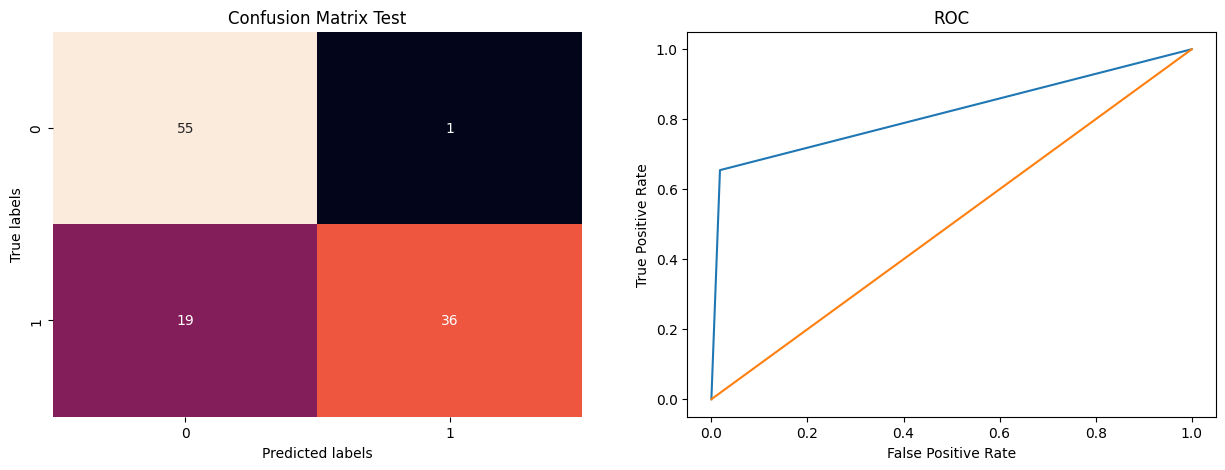

In [251]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

#### **Logistic Regression**

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        56
           1       0.54      0.60      0.57        55

    accuracy                           0.55       111
   macro avg       0.55      0.55      0.55       111
weighted avg       0.55      0.55      0.55       111

AUC ROC :  0.55


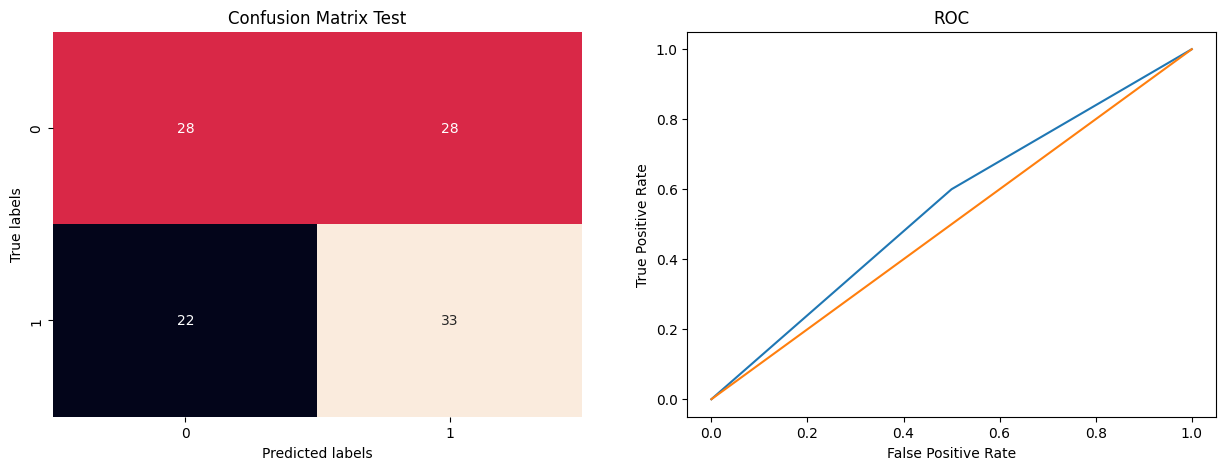

In [252]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

#### **Random Forest**

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        56
           1       0.94      0.85      0.90        55

    accuracy                           0.90       111
   macro avg       0.90      0.90      0.90       111
weighted avg       0.90      0.90      0.90       111

AUC ROC :  0.900487012987013


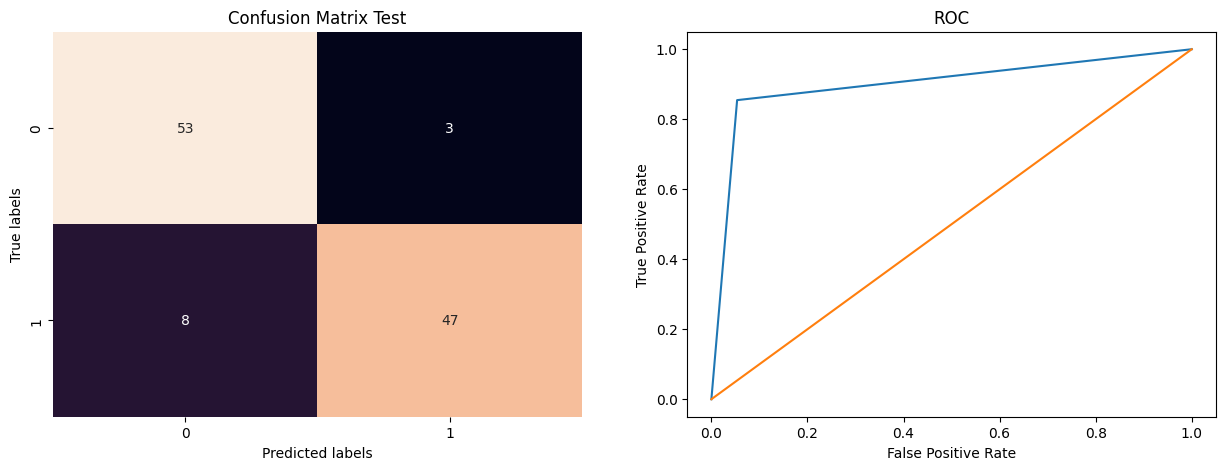

In [253]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

#### **Gradient Boosting**

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        56
           1       0.93      0.78      0.85        55

    accuracy                           0.86       111
   macro avg       0.88      0.86      0.86       111
weighted avg       0.87      0.86      0.86       111

AUC ROC :  0.8641233766233766


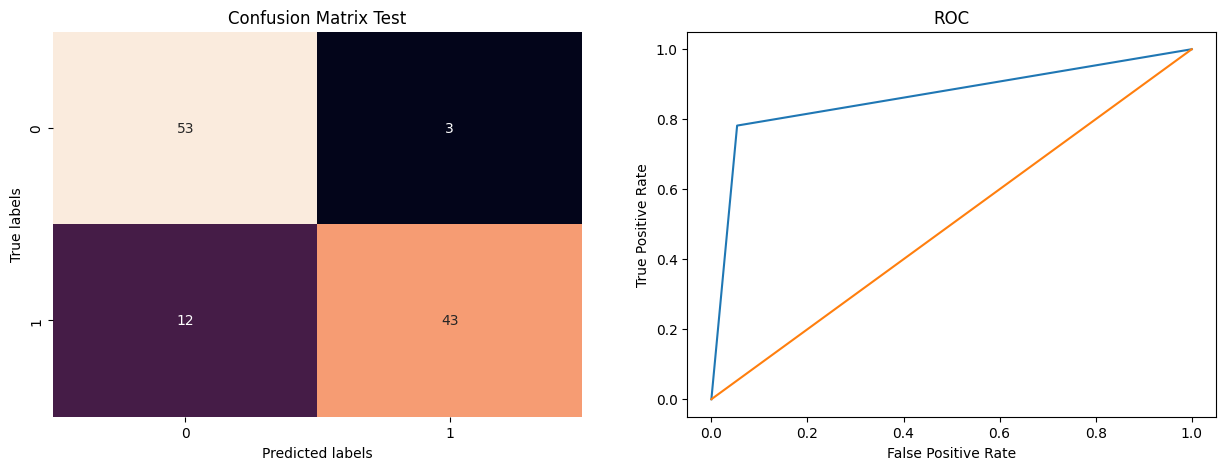

In [254]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

- Accuracy: Measures the proportion of true results among the total number of cases examined. The Random Forest model has the highest accuracy at 90%.
- AUC ROC: Represents the area under the receiver operating characteristic curve. A value of 1 indicates a perfect classifier, while a value of 0.5 suggests the model is no better than random guessing. Again, the Random Forest model performs the best with an AUC ROC of 90.05%.
- F1-Score: Is the harmonic mean of precision and recall and provides a balance between the two. It's especially useful in cases where class distribution is imbalanced. The Random Forest model has the highest F1-scores for both classes.
- Precision and Recall: Precision is about how many of the positively classified were actually positive, while recall (or sensitivity) is about how many of the actual positives our model captured through labeling as positive. In general terms and based on the provided metrics, the Random Forest model seems to balance these two metrics well.

**Based on the metrics provided, the Random Forest model appears to be the best model for your data, having the highest accuracy, AUC ROC, and F1-scores.**

In [255]:
# Extracting feature importances from the Random Forest model
feature_importances = random_forest.feature_importances_

# Creating a DataFrame to display features and their importance scores
features_df = pd.DataFrame({
    'Feature': X_train_upS.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame based on importance scores
features_df = features_df.sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
0,edad,0.272012
1,neuroticism,0.163525
3,openness,0.156750
2,extraversion,0.130379
5,conscientiousness,0.129255
4,agreeableness,0.104406
6,sexo_Female,0.023669
7,sexo_Male,0.020005


- Edad (Age): This is the most influential feature with an importance score of approximately 27.2%. This suggests that age plays a significant role in determining the target variable in this model.
- Neuroticism: Holds the second-highest importance at approximately 16.35%. This means that this personality trait significantly influences the outcome, though not as much as age.
- Openness: Ranks third in importance at about 15.68%.
- Extraversion: Comes next with a score of approximately 13.04%.
- Conscientiousness: Very close to extraversion in importance, with a score of about 12.93%
- Agreeableness: Has an importance of roughly 10.44%, making it the least impactful among the personality traits but still holds a substantial weight.